# CAR EVALUATION

Download the dataset from here:https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

Data Description

We can use Machine Learning techniques to develop an automatic system for car evaluation.A decision to buy a car or not according to its physical qualifications is being discussed in this project. This data set is composed of 1728 rows and 7 different attributes. Based on the information provided by the dataset, each car will be classified, using the six attributes, into unacceptable, acceptable, good or very good.These are given by buying price as Buying_price, maintenance cost as maint_cost,no of doors as  doors,number of persons as person,luggage or boot capaciy as lug_boot, safety and decision.
class is the target variable.

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


C:\Users\Home\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Home\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Home\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Import dataset

In [2]:
data=pd.read_csv('car_evaluation.csv')

View first 10 values

In [3]:
data.head(10)

,Buying_price,maint_cost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
data.tail(10)

,Buying_price,maint_cost,doors,persons,lug_boot,safety,decision
1718,low,low,5more,4,big,high,vgood
1719,low,low,5more,more,small,low,unacc
1720,low,low,5more,more,small,med,acc
1721,low,low,5more,more,small,high,good
1722,low,low,5more,more,med,low,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [5]:
data.shape

(1728, 7)

View summary of dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Buying_price  1728 non-null   object
 1   maint_cost    1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   decision      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Missing Values

In [7]:
data.isnull().sum()

Buying_price    0
maint_cost      0
doors           0
persons         0
lug_boot        0
safety          0
decision        0
dtype: int64

Frequency distribution of values in variables

In [8]:
for i in data.columns:
    print(data[i].value_counts())
    

vhigh    432
high     432
med      432
low      432
Name: Buying_price, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint_cost, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64


Data Visualization

In [9]:
#count plot of decision 

Text(0.5, 1.0, 'Count plot for decision')

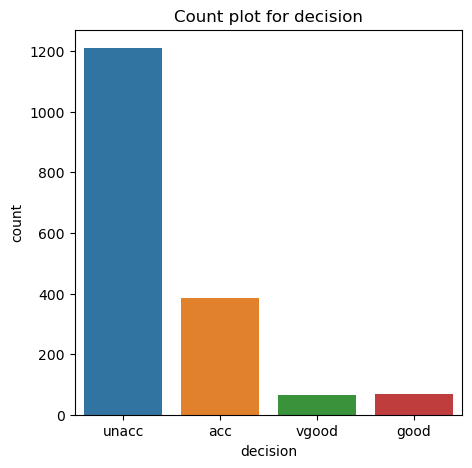

In [116]:
plt.figure(figsize=(5,5))
sns.countplot(x='decision',data=data)
plt.title('Count plot for decision')

In [ ]:
#pie chart of decision

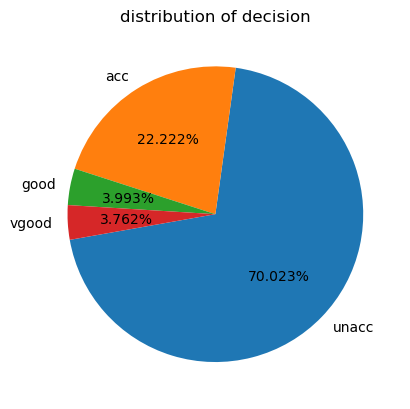

In [117]:
label=['unacc','acc','good','vgood']
slices=data['decision'].value_counts()
labels=label
plt.title('distribution of decision')
plt.pie(slices,labels=labels,startangle=190,autopct='%1.3f%%')
plt.show()

In [ ]:
#checking how decision is dependant on buying price

Text(0.5, 1.0, 'decision')

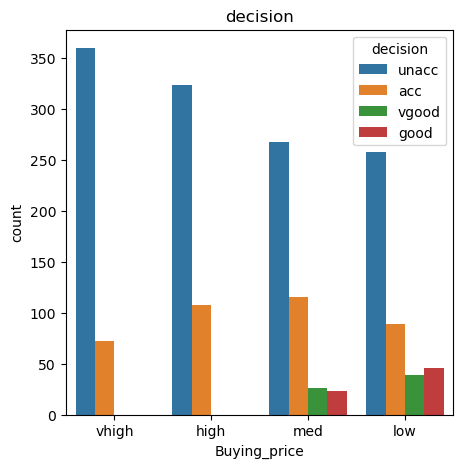

In [121]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='Buying_price',hue='decision')
plt.title('decision')

In [ ]:
#checking how decision is dependant on maintenence price

Text(0.5, 1.0, 'decision')

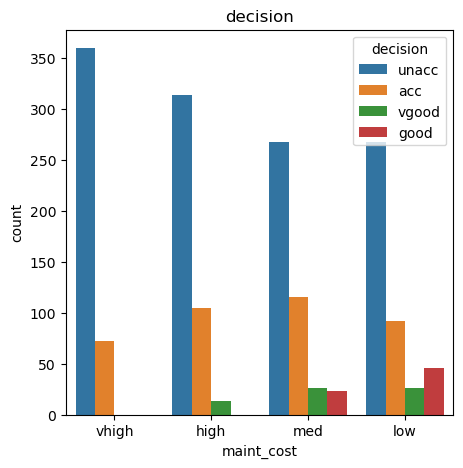

In [124]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='maint_cost',hue='decision')
plt.title('decision')

In [126]:
#checking how decision is dependant on safety

Text(0.5, 1.0, 'decision')

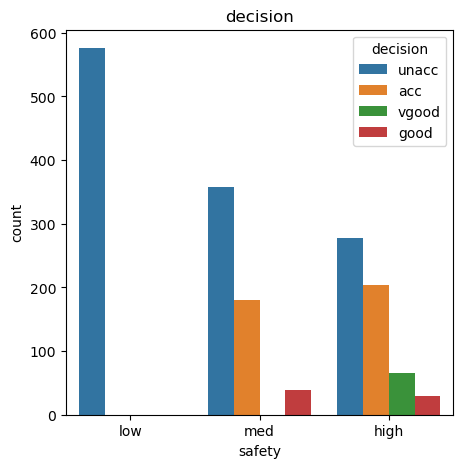

In [125]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='safety',hue='decision')
plt.title('decision')

Encode categorical variables

In [10]:
le=LabelEncoder()

In [15]:
new_data=data.apply(LabelEncoder().fit_transform)
new_data

,Buying_price,maint_cost,doors,persons,lug_boot,safety,decision
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [16]:
new_data

,Buying_price,maint_cost,doors,persons,lug_boot,safety,decision
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [12]:
# data['Buying_price']=le.fit_transform(data['Buying_price'])
# data['maint_cost']=le.fit_transform(data['maint_cost'])
# data['doors']=le.fit_transform(data['doors'])
# data['persons']=le.fit_transform(data['persons'])
# data['lug_boot']=le.fit_transform(data['lug_boot'])
# data['safety']=le.fit_transform(data['safety'])
# data['decision']=le.fit_transform(data['decision'])

In [17]:
new_data['decision'].value_counts()

2    1210
0     384
1      69
3      65
Name: decision, dtype: int64

In [ ]:
# unacc - 1210
# acc   -  384
# good   -   69
# vgood  -   65

Split data into separate training and test set 

In [18]:
x=new_data.drop(['decision'], axis=1)
y =new_data['decision']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)


Decision Tree Classifier

In [20]:
dt =DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train) 
dt_pred=dt.predict(x_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       129
           1       0.69      1.00      0.82        20
           2       0.99      0.99      0.99       397
           3       1.00      0.88      0.94        25

    accuracy                           0.97       571
   macro avg       0.91      0.95      0.92       571
weighted avg       0.98      0.97      0.97       571



In [21]:
accuracy=accuracy_score(y_test,dt_pred)
accuracy

0.9719789842381786

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,dt_pred)
cm

array([[118,   9,   2,   0],
       [  0,  20,   0,   0],
       [  2,   0, 395,   0],
       [  3,   0,   0,  22]], dtype=int64)

In [23]:
dt.predict([[1,1,3,2,2,0]])

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
dt.predict([[3,3,0,0,2,1]])

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])